In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os

%matplotlib inline

In [2]:
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import gc 
import pandas as pd 
import os
from keras.utils import np_utils


Using TensorFlow backend.


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4186241009625238297
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6705216225
locality {
  bus_id: 1
  links {
  }
}
incarnation: 741392761771502020
physical_device_desc: "device: 0, name: Quadro P4000, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


In [4]:
train_x = pd.read_csv('input/train_x.csv', index_col=0, header=None)
train_y = pd.read_csv('input/train_y.csv', index_col=0)
test_x = pd.read_csv('input/test_x.csv', index_col=0, header=None)

mappping_type = {'Bird': 0, 'Airplane': 1}
train_y_bin = train_y.replace({"target": mappping_type})

d1 = [[np.array(x)] for x in train_x.values]
d = {'map': d1, 'target': train_y_bin.target}

df = pd.DataFrame(data=d)

In [5]:
def make_image_gen_cat(in_df):
    out_map = []
    out_class = []
    for index in range(in_df.shape[0]):
        out_map += [in_df.map.values[index][0]]
        out_class += [in_df.target.values[index]]
            
    out_map = np.array(out_map)
    out_map = out_map.reshape(out_map.shape[0], 32, 32, 3)
    return out_map, np.array(np_utils.to_categorical(out_class, num_classes=2))

In [6]:
X, y = make_image_gen_cat(df)

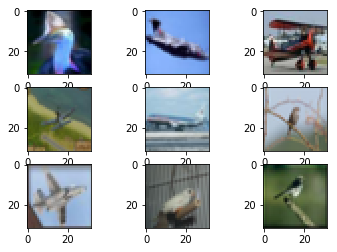

In [7]:
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
x_train.shape, y_valid.shape

((5760, 32, 32, 3), (1440, 2))

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=25,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
#     zoom_range=0.3,
#     shear_range=0.2
    )
datagen.fit(x_train)

In [10]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.utils import np_utils
from keras.callbacks import Callback
import keras

In [11]:
class SmallerVGGNet:
    @staticmethod
    def build1(width, height, depth, classes, finalAct="softmax"):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)

        # CONV => RELU => POOL
        model.add(Conv2D(32, (5, 5), padding="same", 
                         input_shape=inputShape))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        
        
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        model.add(Flatten())
        model.add(Dense(700))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        model.add(Dense(classes))    
        model.add(Activation(finalAct))

        # return the constructed network architecture
        return model
    
    @staticmethod
    def build2(width, height, depth, classes, finalAct="softmax"):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)

        # CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same", 
                         input_shape=inputShape))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))
        
        
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))
        
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        model.add(Dense(classes))    
        model.add(Activation(finalAct))

        # return the constructed network architecture
        return model
    
    @staticmethod
    def build3(width, height, depth, classes, finalAct="softmax"):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)

        # CONV => RELU => POOL
        model.add(Conv2D(16, (3, 3), padding="same", 
                         input_shape=inputShape))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        
        
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
        
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation(activation=keras.layers.LeakyReLU(alpha=0.1)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        model.add(Dense(classes))    
        model.add(Activation(finalAct))

        # return the constructed network architecture
        return model

In [18]:
import resnet

# model_resnet_18 = resnet.ResnetBuilder.build_resnet_18((3, 32, 32), 2)
# model_resnet_18.compile(optimizer=Adam(1e-3, decay=1e-6), 
#              loss="categorical_crossentropy",
#              metrics=["accuracy"])

# model_resnet_34 = resnet.ResnetBuilder.build_resnet_34((3, 32, 32), 2)
# model_resnet_34.compile(optimizer=Adam(1e-3, decay=1e-6), 
#              loss="categorical_crossentropy",
#              metrics=["accuracy"])

# model1 = SmallerVGGNet.build1(width=img_rows, height=img_cols,
#                             depth=channels, classes=2)
# model1.compile(optimizer=Adam(1e-3, decay=1e-6), 
#              loss="categorical_crossentropy",
#              metrics=["accuracy"])

# model2 = SmallerVGGNet.build2(width=img_rows, height=img_cols,
#                             depth=channels, classes=2)
# model2.compile(optimizer=Adam(1e-3, decay=1e-6), 
#              loss="categorical_crossentropy",
#              metrics=["accuracy"])

# model3 = SmallerVGGNet.build3(width=img_rows, height=img_cols,
#                             depth=channels, classes=2)
# model3.compile(optimizer=Adam(1e-3, decay=1e-6), 
#              loss="categorical_crossentropy",
#              metrics=["accuracy"])

In [12]:
class SGDRScheduler(Callback):
    '''Cosine annealing learning rate scheduler with periodic restarts.
    # Usage
        ```python
            schedule = SGDRScheduler(min_lr=1e-5,
                                     max_lr=1e-2,
                                     steps_per_epoch=np.ceil(epoch_size/batch_size),
                                     lr_decay=0.9,
                                     cycle_length=5,
                                     mult_factor=1.5)
            model.fit(X_train, Y_train, epochs=100, callbacks=[schedule])
        ```
    # Arguments
        min_lr: The lower bound of the learning rate range for the experiment.
        max_lr: The upper bound of the learning rate range for the experiment.
        steps_per_epoch: Number of mini-batches in the dataset. Calculated as `np.ceil(epoch_size/batch_size)`. 
        lr_decay: Reduce the max_lr after the completion of each cycle.
                  Ex. To reduce the max_lr by 20% after each cycle, set this value to 0.8.
        cycle_length: Initial number of epochs in a cycle.
        mult_factor: Scale epochs_to_restart after each full cycle completion.
    # References
        Blog post: jeremyjordan.me/nn-learning-rate
        Original paper: http://arxiv.org/abs/1608.03983
    '''
    def __init__(self,
                 min_lr,
                 max_lr,
                 steps_per_epoch,
                 lr_decay=1,
                 cycle_length=10,
                 mult_factor=2):

        self.min_lr = min_lr
        self.max_lr = max_lr
        self.lr_decay = lr_decay

        self.batch_since_restart = 0
        self.next_restart = cycle_length

        self.steps_per_epoch = steps_per_epoch

        self.cycle_length = cycle_length
        self.mult_factor = mult_factor

        self.history = {}

    def clr(self):
        '''Calculate the learning rate.'''
        fraction_to_restart = self.batch_since_restart / (self.steps_per_epoch * self.cycle_length)
        lr = self.min_lr + 0.5 * (self.max_lr - self.min_lr) * (1 + np.cos(fraction_to_restart * np.pi))
        return lr

    def on_train_begin(self, logs={}):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.max_lr)

    def on_batch_end(self, batch, logs={}):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

        self.batch_since_restart += 1
        K.set_value(self.model.optimizer.lr, self.clr())

    def on_epoch_end(self, epoch, logs={}):
        '''Check for end of current cycle, apply restarts when necessary.'''
        if epoch + 1 == self.next_restart:
            self.batch_since_restart = 0
            self.cycle_length = np.ceil(self.cycle_length * self.mult_factor)
            self.next_restart += self.cycle_length
            self.max_lr *= self.lr_decay
            self.best_weights = self.model.get_weights()

    def on_train_end(self, logs={}):
        '''Set weights to the values from the end of the most recent cycle for best performance.'''
        self.model.set_weights(self.best_weights)

In [13]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight1_path="C:\\Users\\user\\Documents\\GitHub\\ml_dafe\\Plane&Bird\\weights1.h5"
weight2_path="C:\\Users\\user\\Documents\\GitHub\\ml_dafe\\Plane&Bird\\weights2.h5"
weight3_path="C:\\Users\\user\\Documents\\GitHub\\ml_dafe\\Plane&Bird\\weights3.h5"
weightResNet18_path="C:\\Users\\user\\Documents\\GitHub\\ml_dafe\\Plane&Bird\\weightsResNet18.h5"
weightResNet34_path="C:\\Users\\user\\Documents\\GitHub\\ml_dafe\\Plane&Bird\\weightsResNet34.h5"

checkpoint_1 = ModelCheckpoint(weight1_path, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only=True)
checkpoint_2 = ModelCheckpoint(weight2_path, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only=True)
checkpoint_3 = ModelCheckpoint(weight3_path, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only=True)
checkpoint_ResNet_18 = ModelCheckpoint(weightResNet18_path, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only=True)
checkpoint_ResNet_34 = ModelCheckpoint(weightResNet34_path, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only=True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_acc', factor=0.33,
                                   patience=3, verbose=1, mode='max',
                                   min_delta=0.0001, cooldown=0, min_lr=1e-6)

early = EarlyStopping(monitor="val_acc", mode="max", verbose=2, 
                      patience=20)

schedule = SGDRScheduler(min_lr=1e-5, 
                         max_lr=1e-2,
                         steps_per_epoch=np.ceil(500/250),
                         lr_decay=0.9,
                         cycle_length=10,
                         mult_factor=1.5)


gc.collect()

14026

In [14]:
from keras import metrics
from keras import backend as K

def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)
            
reset_weights(model1)

NameError: name 'model1' is not defined

In [220]:
callbacks_list = [early, schedule, checkpoint_1]

history = model1.fit_generator(datagen.flow(x_train, y_train, batch_size=250),
                              steps_per_epoch=100,
                              epochs=500,
                              validation_data=(x_valid, y_valid),
                              callbacks=callbacks_list,
                              verbose=1)

Epoch 1/500
100/100 [==============================] - 10s 102ms/step - loss: 0.7334 - acc: 0.7174 - val_loss: 1.4770 - val_acc: 0.4944

Epoch 00001: val_acc did not improve from 0.76042
Epoch 2/500
100/100 [==============================] - 10s 100ms/step - loss: 0.5124 - acc: 0.7751 - val_loss: 1.0883 - val_acc: 0.5215

Epoch 00002: val_acc did not improve from 0.76042
Epoch 3/500
100/100 [==============================] - 10s 101ms/step - loss: 0.4426 - acc: 0.8064 - val_loss: 1.1554 - val_acc: 0.5222

Epoch 00003: val_acc did not improve from 0.76042
Epoch 4/500
100/100 [==============================] - 10s 100ms/step - loss: 0.4988 - acc: 0.7867 - val_loss: 1.4362 - val_acc: 0.5757

Epoch 00004: val_acc did not improve from 0.76042
Epoch 5/500
100/100 [==============================] - 10s 100ms/step - loss: 0.4904 - acc: 0.7841 - val_loss: 0.5383 - val_acc: 0.7951

Epoch 00005: val_acc improved from 0.76042 to 0.79514, saving model to C:\Users\user\Documents\GitHub\ml_dafe\Plane

100/100 [==============================] - 10s 102ms/step - loss: 0.2825 - acc: 0.8854 - val_loss: 0.4332 - val_acc: 0.8417

Epoch 00083: val_acc did not improve from 0.90903
Epoch 84/500
100/100 [==============================] - 12s 117ms/step - loss: 0.3109 - acc: 0.8827 - val_loss: 0.2779 - val_acc: 0.8903

Epoch 00084: val_acc did not improve from 0.90903
Epoch 85/500
100/100 [==============================] - 10s 95ms/step - loss: 0.2814 - acc: 0.8854 - val_loss: 0.2713 - val_acc: 0.8903

Epoch 00085: val_acc did not improve from 0.90903
Epoch 86/500
100/100 [==============================] - 10s 103ms/step - loss: 0.2681 - acc: 0.8930 - val_loss: 0.3042 - val_acc: 0.8729

Epoch 00086: val_acc did not improve from 0.90903
Epoch 00086: early stopping


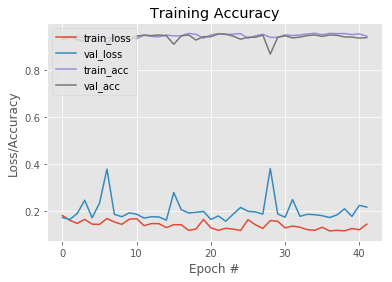

In [173]:
# plot the training loss
plt.style.use("ggplot")
plt.figure()
N = len(history.epoch)
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
# plot the trainingaccuracy
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left");

### Test the best model 

In [46]:
model3.load_weights(weight3_path)

In [47]:
model_train_acc=model3.evaluate(x_valid, y_valid, batch_size=128)
print(model_train_acc)

1440/1440 [==============================] - 0s 160us/step
[0.08355529475957155, 0.9763888888888889]


### Load test data

In [44]:
test_x = pd.read_csv('input/test_x.csv', index_col=0, header=None)
test_d1 = [[np.array(x)] for x in test_x.values]
test_d1 = {'map': test_d1}
test = pd.DataFrame(data=test_d1)

In [45]:
out_map = []
out_class = []
for index, row in test.iterrows():
    out_map += [pd.Series(row).values[0][0]]

out_map = np.array(out_map)
out_map = out_map.reshape(out_map.shape[0], 32, 32, 3)
out_map = np.stack(out_map, 0)

In [180]:
# out_map = x_valid

### Merge models submit 

#### Compile models

In [19]:
model_resnet_18 = resnet.ResnetBuilder.build_resnet_18((3, 32, 32), 2)
model_resnet_18.compile(optimizer=Adam(1e-3, decay=1e-6), 
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model_resnet_34 = resnet.ResnetBuilder.build_resnet_34((3, 32, 32), 2)
model_resnet_34.compile(optimizer=Adam(1e-3, decay=1e-6), 
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model1 = SmallerVGGNet.build1(width=img_rows, height=img_cols,
                            depth=channels, classes=2)
model1.compile(optimizer=Adam(1e-3, decay=1e-6), 
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model2 = SmallerVGGNet.build2(width=img_rows, height=img_cols,
                            depth=channels, classes=2)
model2.compile(optimizer=Adam(1e-3, decay=1e-6), 
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model3 = SmallerVGGNet.build3(width=img_rows, height=img_cols,
                            depth=channels, classes=2)
model3.compile(optimizer=Adam(1e-3, decay=1e-6), 
             loss="categorical_crossentropy",
             metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\user\Anaconda3\envs\pytorch\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Load weights

In [20]:
%%time
models = [model1, model2, model3, model_resnet_18, model_resnet_34]
weights = [weight1_path, weight2_path, weight3_path, weightResNet18_path, weightResNet34_path]

y_test_pred = np.zeros((out_map.shape[0],2))
for model, weigth in zip(models, weights):
    model.load_weights(weigth)
    y_test_pred += model.predict(out_map)
    
    model_train_acc=model.evaluate(x_valid, y_valid, batch_size=128)
    print(model_train_acc)

1440/1440 [==============================] - 1s 622us/step
[0.2230210542678833, 0.9090277777777778]
1440/1440 [==============================] - 1s 540us/step
[0.12325084205302927, 0.9486111111111111]
1440/1440 [==============================] - 1s 538us/step
[0.08355529475957155, 0.9763888888888889]
1440/1440 [==============================] - 1s 698us/step
[0.19551869879166286, 0.9527777777777777]
1440/1440 [==============================] - 1s 739us/step
[0.24159925017091963, 0.9326388888888889]
Wall time: 24 s


In [21]:
y_test_pred

array([[0.00811914, 4.99188089],
       [2.55728215, 2.44271784],
       [4.96439946, 0.03560064],
       ...,
       [4.75490433, 0.24509561],
       [1.37978464, 3.62021524],
       [0.02726813, 4.97273201]])

In [48]:
%%time
print(y_test_pred.shape)

y_test_pred = model3.predict(out_map)

df = np.array([[i, x.argmax()] for i, x in enumerate(y_test_pred)])
sample = pd.DataFrame(df, columns=['id', 'target'])

mappping_type_inv = {0: 'Bird', 1: 'Airplane'}
sample = sample.replace({'target': mappping_type_inv})

sample.to_csv('output/merge_best1model.csv', index=False)

(4800, 2)
Wall time: 1.22 s


In [38]:
sample.target.values

array(['Airplane', 'Bird', 'Bird', ..., 'Bird', 'Airplane', 'Airplane'],
      dtype=object)

In [39]:
out_map[1].shape

(32, 32, 3)

Processing 0 thousands images


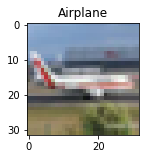

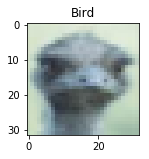

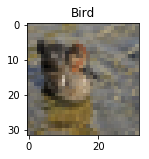

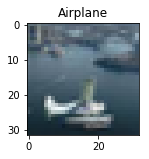

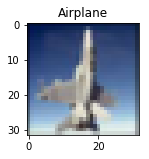

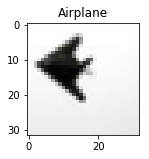

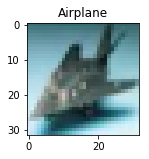

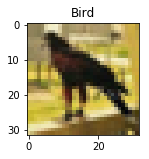

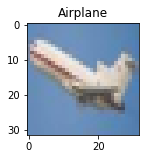

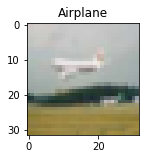

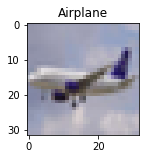

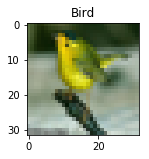

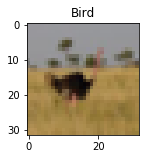

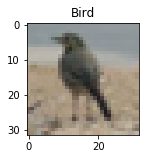

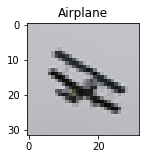

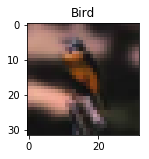

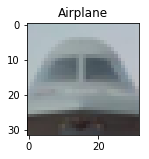

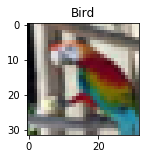

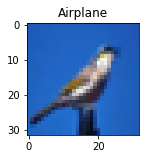

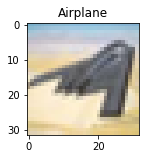

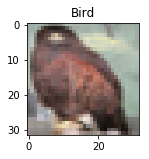

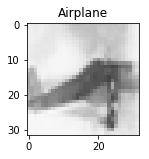

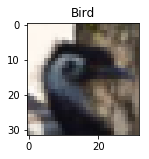

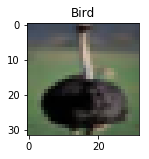

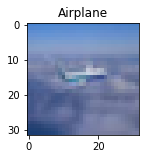

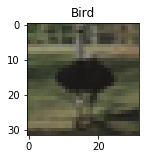

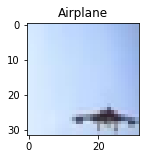

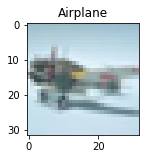

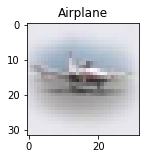

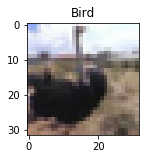

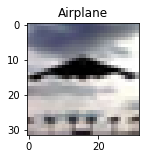

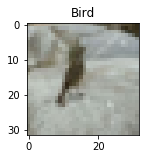

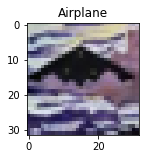

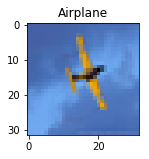

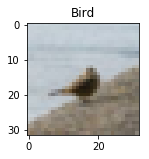

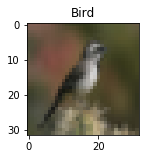

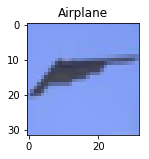

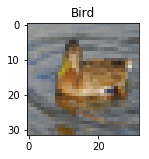

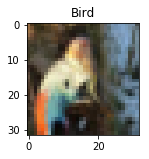

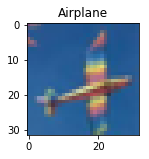

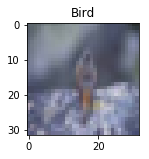

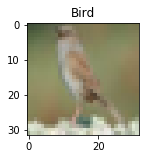

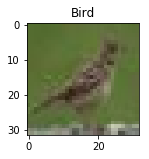

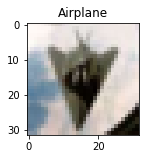

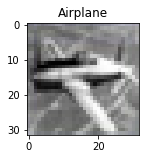

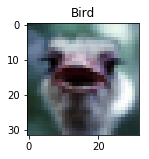

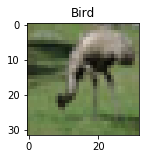

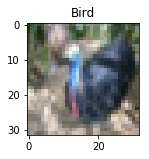

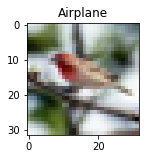

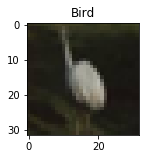

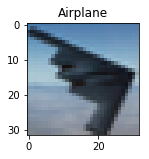

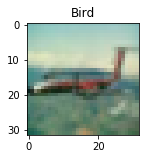

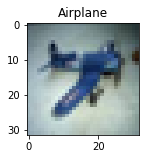

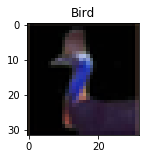

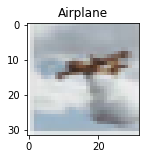

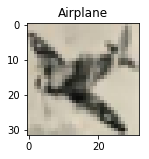

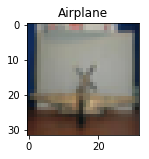

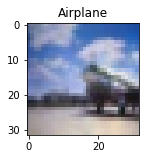

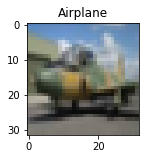

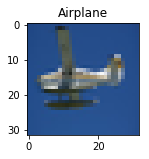

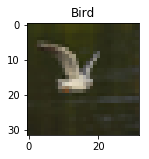

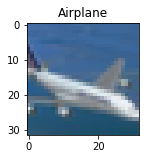

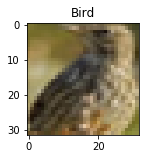

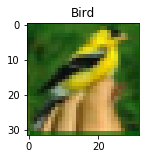

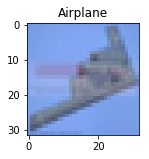

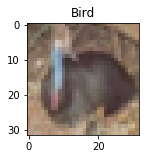

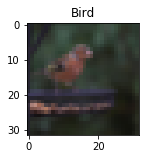

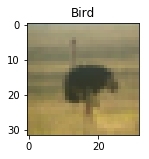

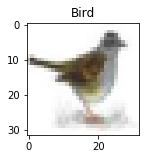

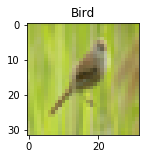

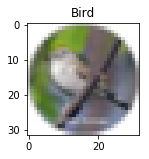

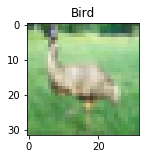

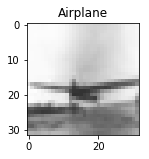

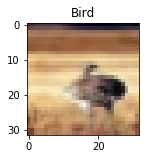

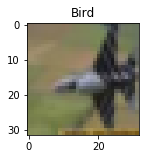

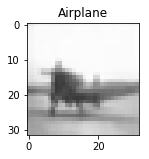

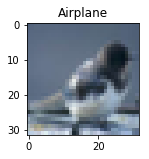

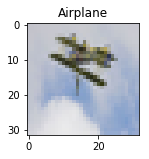

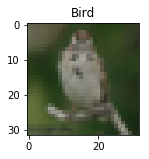

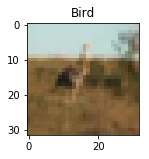

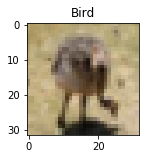

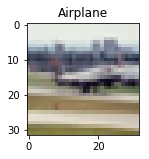

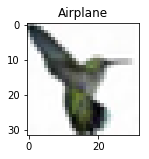

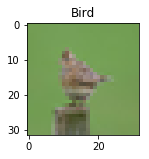

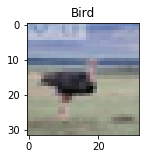

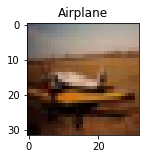

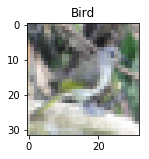

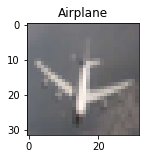

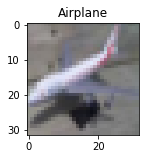

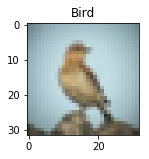

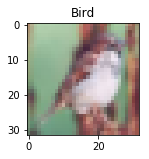

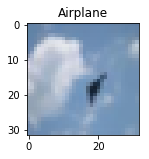

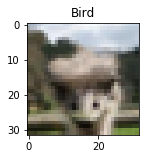

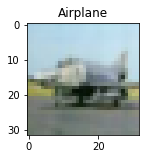

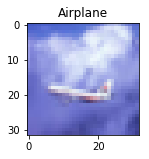

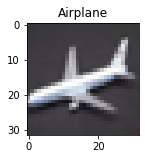

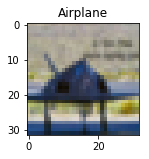

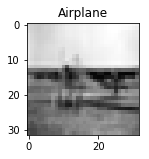

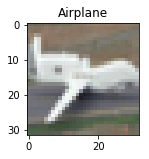

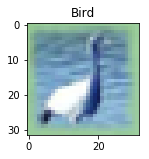

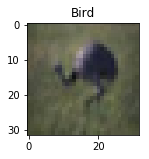

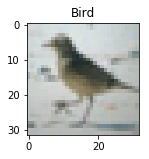

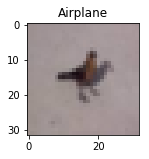

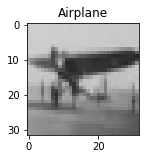

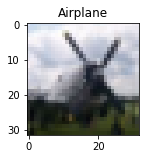

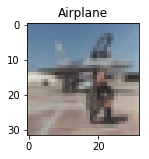

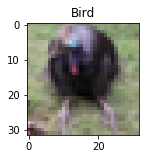

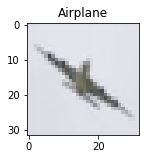

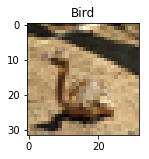

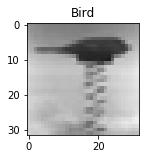

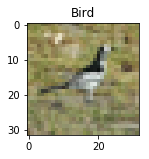

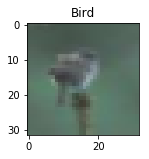

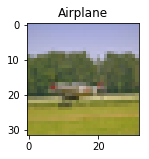

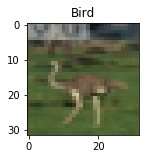

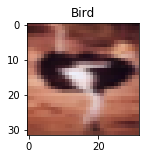

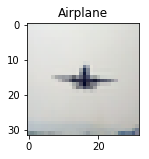

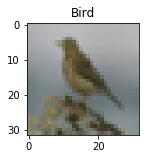

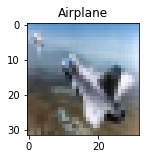

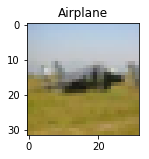

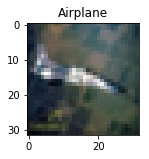

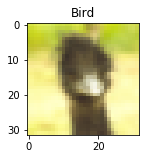

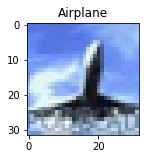

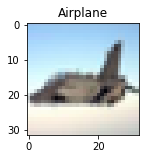

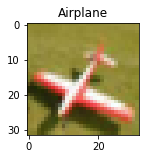

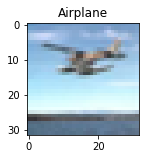

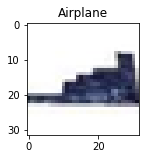

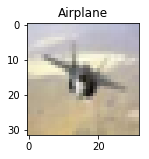

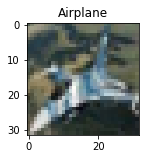

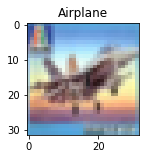

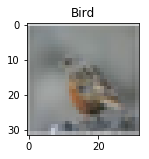

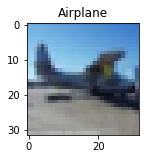

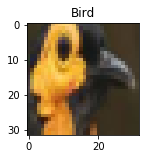

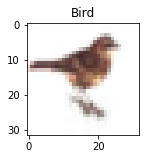

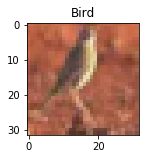

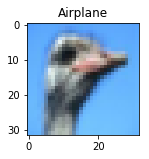

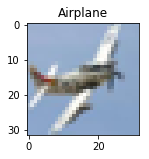

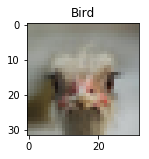

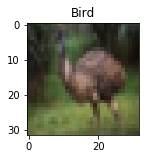

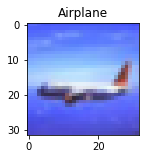

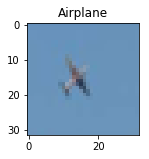

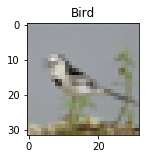

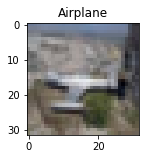

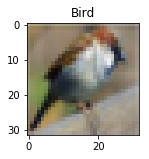

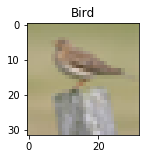

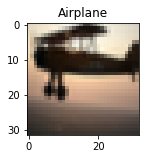

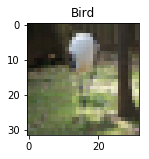

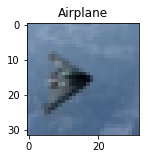

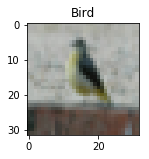

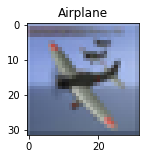

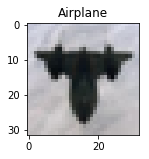

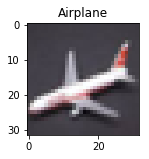

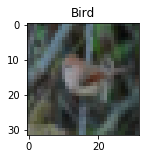

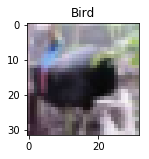

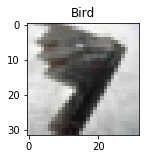

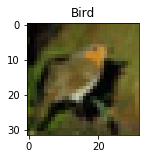

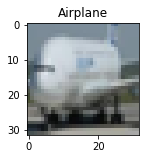

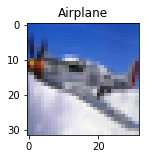

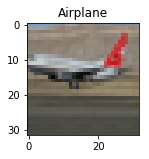

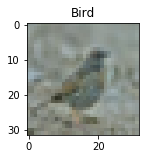

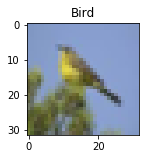

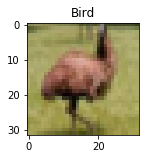

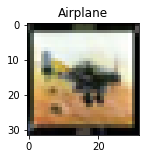

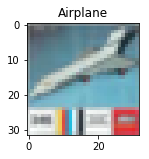

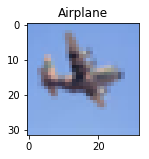

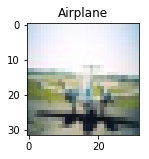

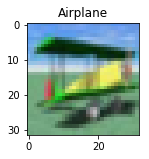

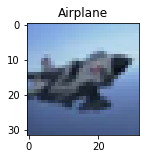

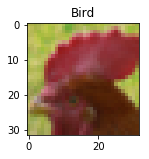

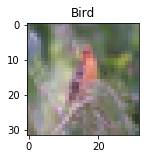

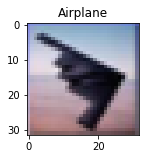

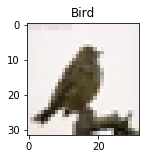

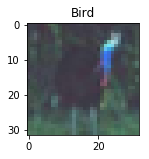

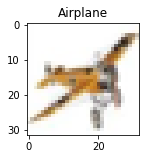

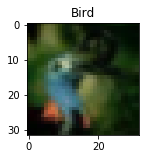

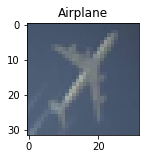

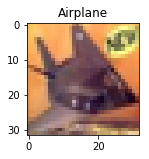

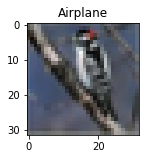

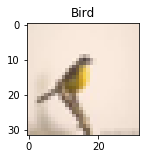

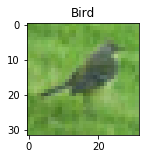

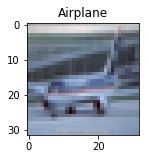

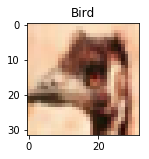

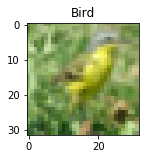

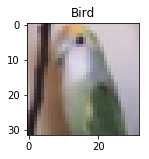

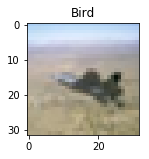

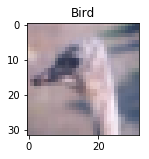

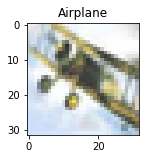

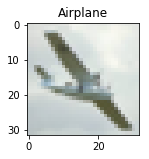

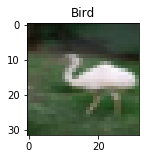

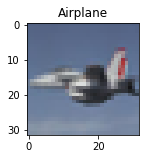

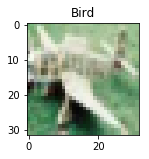

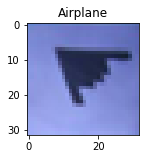

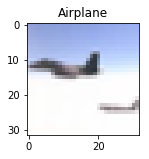

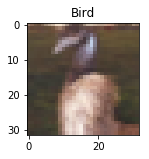

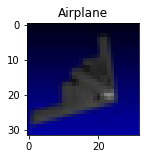

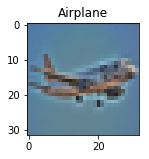

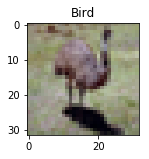

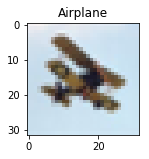

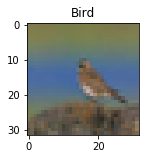

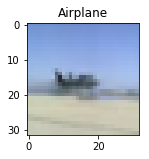

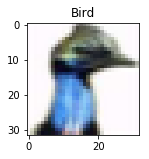

In [49]:
for i, (img, target) in enumerate(zip(out_map[:200], sample.target.values)):
    if i % 1000 == 0:
        print('Processing {} thousands images'.format(i // 1000))
    fig, m_axs = plt.subplots(1, 1, figsize = (2, 3))
    ax1= m_axs
    ax1.imshow(img)
    ax1.set_title(target)

In [204]:
from sklearn.metrics import accuracy_score
merge_y = np.array([[i, x.argmax()] for i, x in enumerate(y_test_pred)])

y_test_pred_solo = model3.predict(out_map)
solo_y = np.array([[i, x.argmax()] for i, x in enumerate(y_test_pred_solo)])

print('merge', accuracy_score(merge_y.T[1], np.argmax(y_valid, axis=1)))
print('solo', accuracy_score(solo_y.T[1], np.argmax(y_valid, axis=1)))


merge 0.9493055555555555
solo 0.9520833333333333


In [198]:
merge_y.T[1]

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [203]:
np.argmax(y_valid, axis=1)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)